<a href="https://colab.research.google.com/github/prathibha-1234/YOLO-Object-Detection-Using-OpenCV-and-python/blob/main/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python


In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [9]:
image = cv2.imread("/content/busimage.jpg")

In [10]:
type(image)

numpy.ndarray

In [11]:
image.shape


(190, 265, 3)

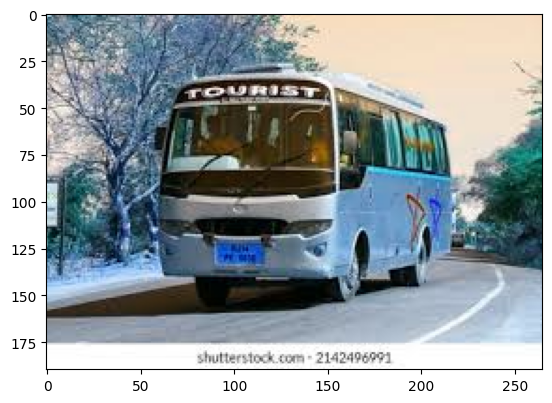

In [12]:
plt.imshow(image)

In [13]:
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


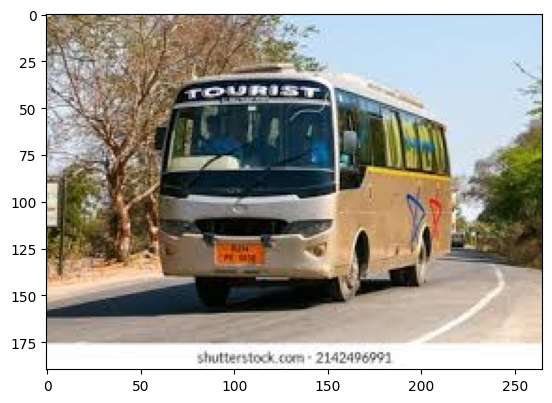

In [14]:
plt.imshow(new_image)

In [16]:
r,g,b = cv2.split(new_image)
print('r', r.shape)
print('g', g.shape)
print('b', b.shape)

new_image = cv2.merge((r,g,b))

r (190, 265)
g (190, 265)
b (190, 265)


In [18]:
s=10
w=int(new_image.shape[1]*s/100)
h=int(new_image.shape[0]*s/100)
dim=  (w,h)
re_size=cv2.resize(new_image, dim, interpolation = cv2.INTER_AREA)
re_size.shape


(19, 26, 3)

In [19]:
(h,w) = new_image.shape[:2]

c=(w/2 , h/2)
angle=90
m=cv2.getRotationMatrix2D(c, angle, 1.0)
rotate_90 = cv2.warpAffine(new_image, m, (h,w))

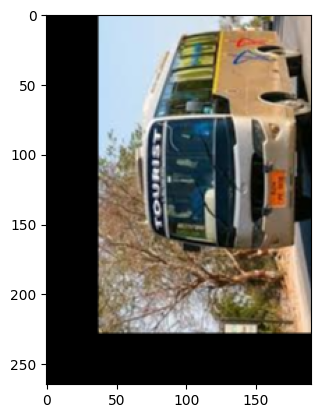

In [20]:
plt.imshow(rotate_90)

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [23]:
yolo = cv2.dnn.readNet("/content/yolov3.weights", "/content/yolov3 (1).cfg")

In [50]:
classes = []
with open("/content/coco.names", 'r') as f:
  classes= f.read().splitlines()

In [51]:
len(classes)

80

In [52]:
img = cv2.imread("/content/traff.jpg")
height,width,_ = img.shape
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320) ,(0,0,0), swapRB=True, crop=False)


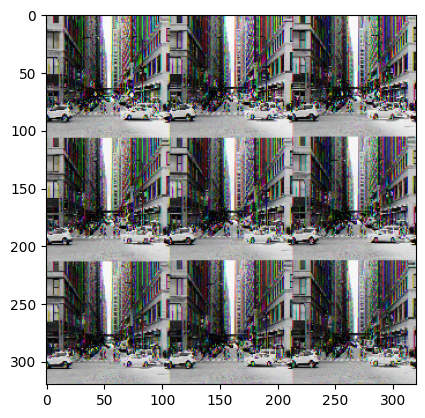

In [53]:
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [54]:
yolo.setInput(blob)

In [55]:
output_layer_names = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_names)

In [56]:
boxes=[]
confidences=[]
class_ids=[]
height, width, channels = img.shape
nms_threshold = 0.4
for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7:
      center_x = int(detection[0]*width)
      center_y = int(detection[0]*height)
      w = int(detection[0]*width)
      h=int(detection[0]*height)
      x=int(center_x- w/2)
      y=int(center_y- h/2)
      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)



In [57]:
len(boxes)

17

In [58]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,0.4)



In [59]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size=(len(boxes),3))

In [62]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]
  label=str(classes[class_ids[i]])
  confi = str(round(confidences[i], 2))
  color = colors[i]
  cv2.rectangle(img, (x,y),(x+w, y+h), color, 2)
  cv2.putText(img,label+" "+confi, (x,y+20),font,2, (255,255,255), 2)

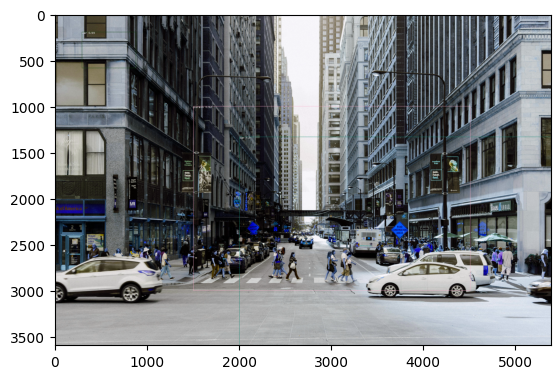

In [63]:
plt.imshow(img)

In [64]:
cv2.imwrite("./img.jpg", img)

True